In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#### EDA de 'steam_game.parquet'

In [106]:
games = pd.read_parquet('Datasets/steam_game.parquet')
games.head(3)

,genres_clean,app_name,price,id,developer,release_year
88310,Action,Lost Summoner Kitty,4.99,761140,Kotoshiro,2018
88311,Free to Play,Ironbound,0.00,643980,Secret Level SRL,2018
88312,Casual,Real Pool 3D - Poolians,0.00,670290,Poolians.com,2017


In [107]:
print("Filas:{}, columnas:{} ".format(*games.shape))

Filas:32134, columnas:6 


##### Tipos de variables
- **Variables cuantitativas**: Price
- **Variables cualitativas** : Genres,  app_name,  id,  developer,  release_year
 

In [108]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32134 entries, 88310 to 120444
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres_clean  32134 non-null  object 
 1   app_name      32132 non-null  object 
 2   price         32134 non-null  float64
 3   id            32134 non-null  object 
 4   developer     28835 non-null  object 
 5   release_year  32134 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.7+ MB


In [109]:
#Modifico el nombre de la columnas ' gen
games.rename(columns ={'genres_clean': 'genres'},inplace=True)

In [110]:
print(f"Datos nulos: \n{games.isnull().sum()} ")
print(f"Filas duplicadas: {games.duplicated().sum()}")

Datos nulos: 
genres             0
app_name           2
price              0
id                 0
developer       3299
release_year       0
dtype: int64 
Filas duplicadas: 0


In [111]:
# Elimino los valores nulos
games.dropna(subset=['developer'],inplace=True)

#### Analisis de price

In [112]:
games['price'].describe()

count    28835.000000
mean         8.626490
std         15.808908
min          0.000000
25%          1.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64

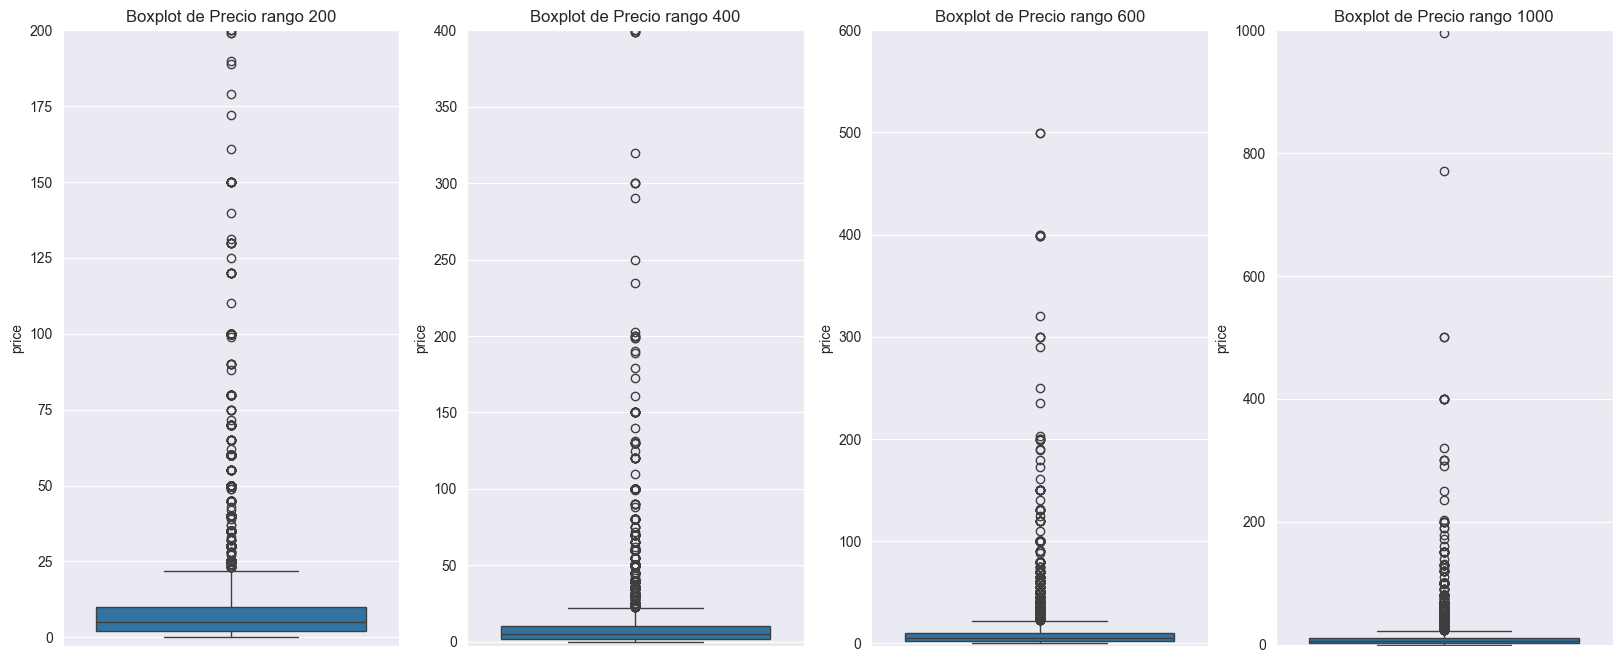

In [113]:
plt.figure(figsize=(20, 8))  # Establecer el tamaño de la figura
sns.set_style("darkgrid")

# Primer0
plt.subplot(1, 4, 1)  # Una fila, dos columnas, primera subparcela
sns.boxplot(data=games, y='price')
plt.ylim(-3, 200)  # Establecer límites en el eje y
plt.title("Boxplot de Precio rango 200")  # Agregar título

# Segundo
plt.subplot(1, 4, 2)  
sns.boxplot(data=games, y='price')
plt.ylim(-3, 400)  # Establecer límites en el eje y
plt.title("Boxplot de Precio rango 400")  # Agregar título

#Tercero
plt.subplot(1, 4, 3)  # Una fila, dos columnas, segunda subparcela
sns.boxplot(data=games, y='price')
plt.ylim(-3, 600)  # Establecer límites en el eje y
plt.title("Boxplot de Precio rango 600")  # Agregar título

#Cuarto
plt.subplot(1, 4, 4)  # Una fila, dos columnas, segunda subparcela
sns.boxplot(data=games, y='price')
plt.ylim(-3, 1000)  # Establecer límites en el eje y
plt.title("Boxplot de Precio rango 1000")  # Agregar título
plt.show()

Nube de palabras de la columna 'genres'.

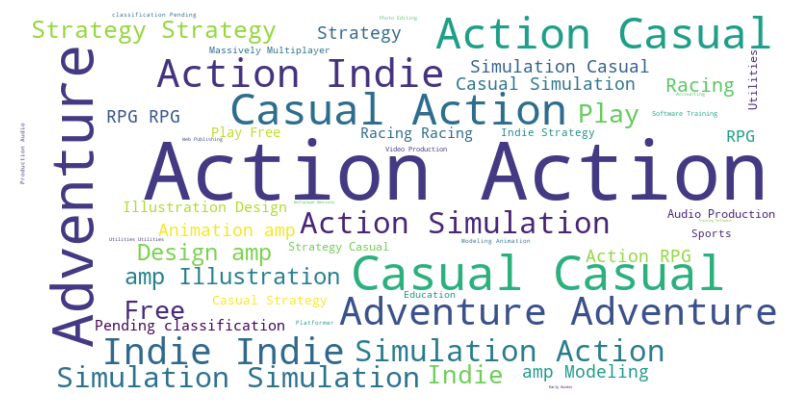

In [114]:
lista = games['genres'].to_list()
texto = ' '.join(games['genres'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Cantidad de juegos por genero.

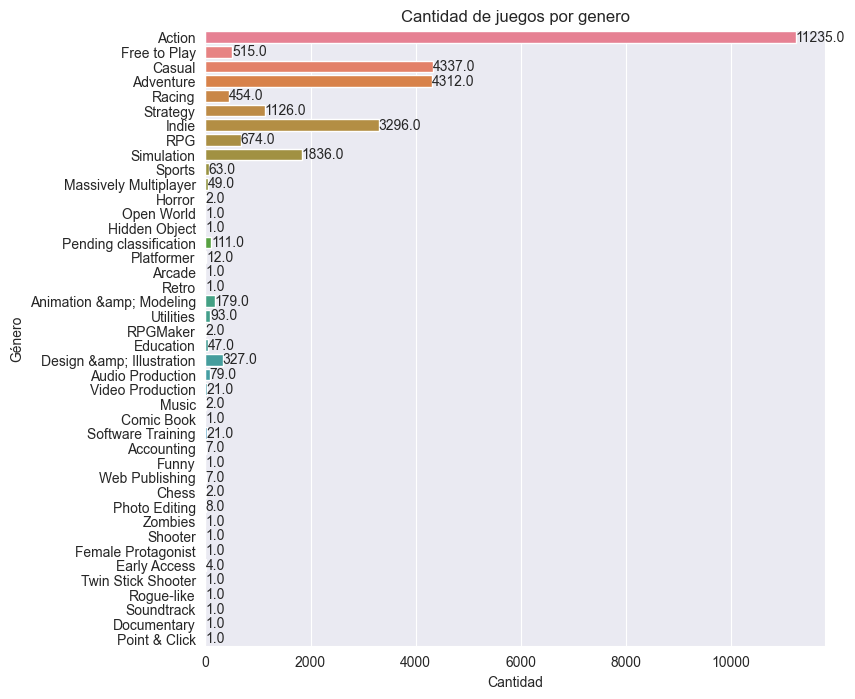

In [115]:
plt.figure(figsize=(8, 8))

ax = sns.countplot(data=games, y='genres', orient='h',hue='genres')
sns.set_style("darkgrid")
ax.set_title('Cantidad de juegos por genero')
ax.set_xlabel('Cantidad')
ax.set_ylabel('Género')

# Agregar etiquetas de valor a cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 0.1, p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.show()


Top de 10 desarrolladores con mas juegos.

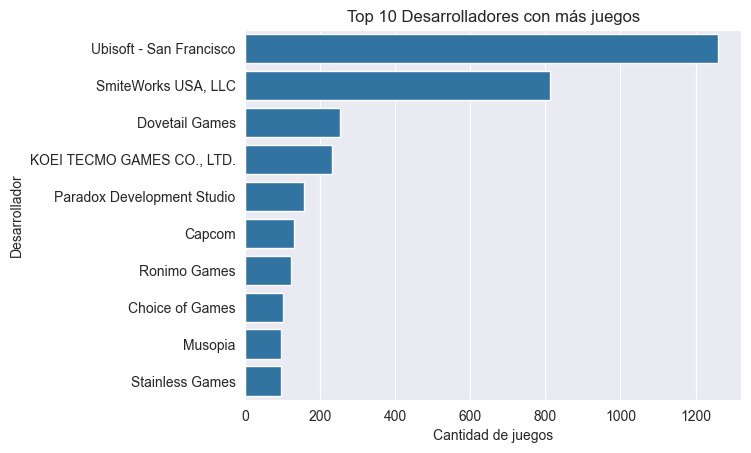

In [116]:
# Obtener los 10 principales desarrolladores
top_devs = games['developer'].value_counts().head(10)

# Filtrar el DataFrame games para incluir solo los juegos de los 10 principales desarrolladores
games_filtered = games[games['developer'].isin(top_devs.index)]

# Trazar el gráfico de barras
sns.countplot(y='developer', data=games_filtered, order=top_devs.index)

plt.xlabel('Cantidad de juegos')
plt.ylabel('Desarrollador')
plt.title('Top 10 Desarrolladores con más juegos')
plt.show()


In [118]:
def cantidad (df,columna: str):
    count = df[columna].value_counts()
    porcentaje = round((count / len(df[columna])* 100),2)
    
    output = pd.DataFrame({'Cantidad':count,'Porcentaje': porcentaje})
    return output

In [119]:
# TOP 10 años con mayor cantidad de lanzamientos
cantidad(games,'release_year').head(10)

,Cantidad,Porcentaje
release_year,,
2017,9200,31.91
2016,6707,23.26
2015,4772,16.55
2014,2736,9.49
2013,1440,4.99
2012,1149,3.98
2011,551,1.91
2010,403,1.40
2009,317,1.10


#### EDA de 'user_items.parquet'

In [120]:
items = pd.read_parquet('Datasets/user_items.parquet')
items.sample(3)

,item_id,item_name,playtime_forever,user_id,items_count
2874200,346330,BrainBread 2,6,76561198060891034,140
4527242,236830,Red Orchestra 2: Heroes of Stalingrad - Single...,0,76561198057323179,77
2760118,42710,Call of Duty: Black Ops - Multiplayer,363,Jack-Daniels,25


In [121]:
print("Filas:{}, columnas:{} ".format(*items.shape))

Filas:5094105, columnas:5 


In [122]:
items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5094105 entries, 0 to 5153208
Data columns (total 5 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   item_id           object
 1   item_name         object
 2   playtime_forever  int64 
 3   user_id           object
 4   items_count       int64 
dtypes: int64(2), object(3)
memory usage: 233.2+ MB


In [123]:
print(f"Datos nulos: \n{items.isnull().sum()} ")
print(f"Filas duplicadas: {items.duplicated().sum()}")

Datos nulos: 
item_id             0
item_name           0
playtime_forever    0
user_id             0
items_count         0
dtype: int64 
Filas duplicadas: 13


In [124]:
#Eliminamos los duplicados
items.drop_duplicates(inplace=True)

Top juegos con mayor tiempo jugados

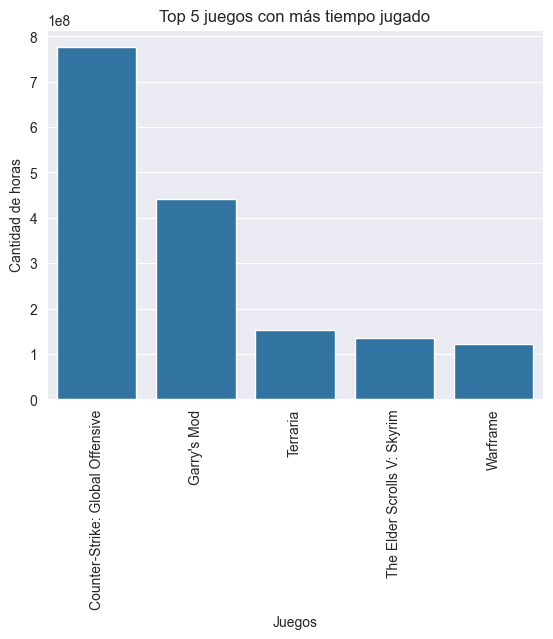

In [125]:
# Agrupa los nombres por cantidad de horas
tiempo_total = items.groupby('item_name')['playtime_forever'].sum().reset_index()

# Ordenar los juegos por tiempo total jugado
ordenado = tiempo_total.sort_values(by='playtime_forever', ascending=False)
top5 = ordenado.head(5)

sns.barplot(x='item_name', y='playtime_forever', data=top5)
plt.title('Top 5 juegos con más tiempo jugado')
plt.ylabel('Cantidad de horas')
plt.xlabel('Juegos')
plt.xticks(rotation=90)
plt.show()

#### EDA reviews

In [62]:
final = pd.read_parquet('Datasets/df_merge.parquet')
final.head(3)

,genres_clean,app_name,price,item_id,developer,release_year,item_name,playtime_forever,user_id,items_count,recommend,review,posted_year,sentiment_analysis
0,Action,Half-Life,9.99,70,Valve,1998,Half-Life,1395.0,EizanAratoFujimaki,391.0,True,ADVERTENCIA:Este Análisis contiene posibles Sp...,2015.0,2.0
1,Action,Half-Life,9.99,70,Valve,1998,Half-Life,590.0,GamerFag,64.0,True,If you own any half life but not this one that...,2011.0,0.0
2,Action,Half-Life,9.99,70,Valve,1998,Half-Life,5599.0,76561198020928326,110.0,True,this game has had me hooked for over 4 years a...,2014.0,2.0


In [128]:
print("Filas:{}, columnas:{} ".format(*final.shape))

Filas:31935, columnas:14 


In [127]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31935 entries, 0 to 31934
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   genres_clean        31935 non-null  object 
 1   app_name            31935 non-null  object 
 2   price               31935 non-null  float64
 3   item_id             31935 non-null  object 
 4   developer           31935 non-null  object 
 5   release_year        31935 non-null  object 
 6   item_name           31935 non-null  object 
 7   playtime_forever    31935 non-null  float64
 8   user_id             31935 non-null  object 
 9   items_count         31935 non-null  float64
 10  recommend           31935 non-null  bool   
 11  review              31935 non-null  object 
 12  posted_year         31935 non-null  float64
 13  sentiment_analysis  31935 non-null  float64
dtypes: bool(1), float64(5), object(8)
memory usage: 3.2+ MB


In [126]:
print(f"Datos nulos: \n{final.isnull().sum()} ")

Datos nulos: 
genres_clean          0
app_name              0
price                 0
item_id               0
developer             0
release_year          0
item_name             0
playtime_forever      0
user_id               0
items_count           0
recommend             0
review                0
posted_year           0
sentiment_analysis    0
dtype: int64 


Juegos mas y menos recomendados

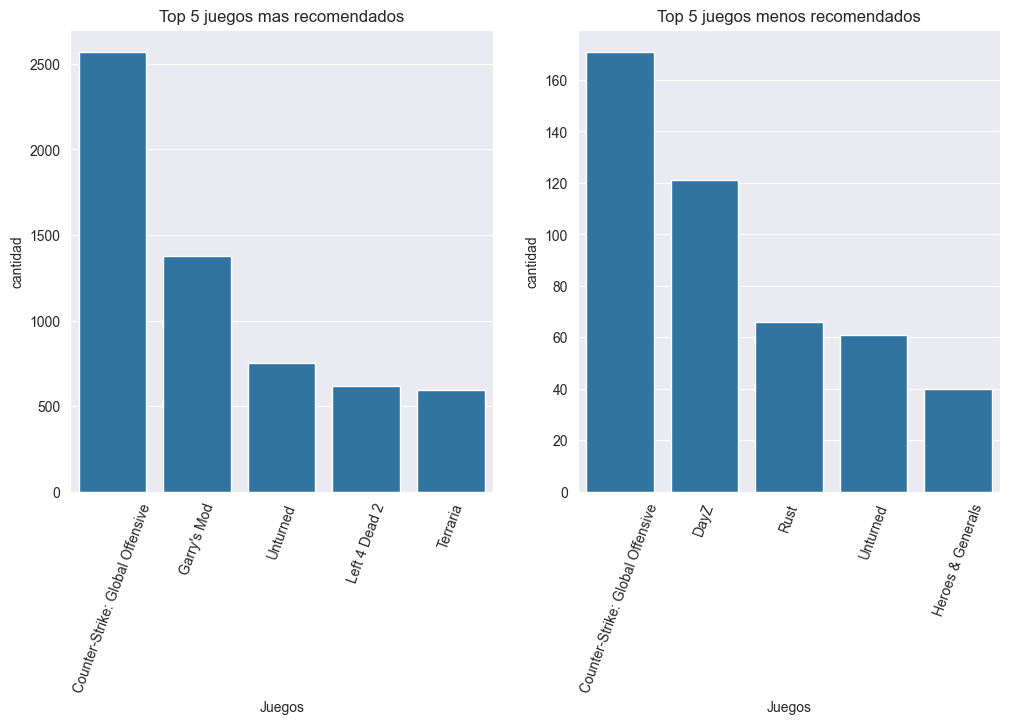

In [129]:
recomendados = final[final['recommend'] == True]
juegos = recomendados.groupby(['app_name'])['recommend'].count().sort_values(ascending= False).head(5)
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.barplot(y=juegos.values, x=juegos.index) 
plt.title('Top 5 juegos mas recomendados')
plt.xlabel('Juegos') 
plt.ylabel('cantidad') 
plt.xticks(rotation=70)

menos_recomendados = final[final['recommend'] == False]
juegos = menos_recomendados.groupby(['app_name'])['recommend'].count().sort_values(ascending= False).head(5)

plt.subplot(1,2,2)
sns.barplot(y=juegos.values, x=juegos.index) 
plt.title('Top 5 juegos menos recomendados')
plt.xlabel('Juegos') 
plt.ylabel('cantidad') 
plt.xticks(rotation=70)
plt.show() 

Analisis de sentimientos

In [130]:
count = final['sentiment_analysis'].value_counts()

print("Positivos(2): {}, Neutrales(1): {}, Negativos(0): {} ".format(*count))

Positivos(2): 20388, Neutrales(1): 6649, Negativos(0): 4898 


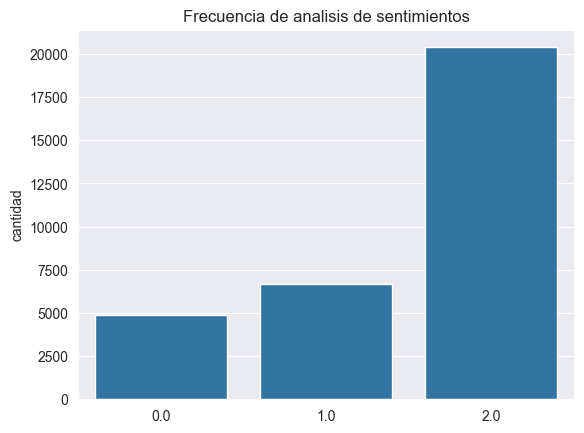

In [131]:
sns.countplot(x='sentiment_analysis', data=final)
plt.title('Frecuencia de analisis de sentimientos')
plt.ylabel('cantidad')
plt.xlabel('')
plt.show()